In [1]:
from os import getcwd
from os.path import abspath, join

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import numpy as np
import pickle

In [2]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# set plotting params
s, f = 5, 2
models = ['V1', 'classical', 'incompatible']
colors = {'V1': '#2c7fb8', 'classical': '#d95f02', 'incompatible': '#91cf60'}
hidden_size = np.array([50, 100, 400, 1000])
learning_rate = np.array([0.001, 0.01, 0.1])
n_epochs = 3001

In [3]:
data_dir = abspath(join(getcwd(), '../../'))

### Load saved results from initializing networks

In [4]:
load_dir = data_dir + '/models/results/'

# load mnist results
with open(load_dir + '/initialize_mnist/clf_s=%0.2f_f=%0.2f_GD_torch.pickle' % (s, f), 'rb') as handle:
    mnist = pickle.load(handle)
    
# load kmnist results
with open(load_dir + '/initialize_kmnist/clf_s=%0.2f_f=%0.2f_GD_torch.pickle' % (s, f), 'rb') as handle:
    kmnist = pickle.load(handle)

### Plot classification results on the MNIST dataset

#### plot training loss

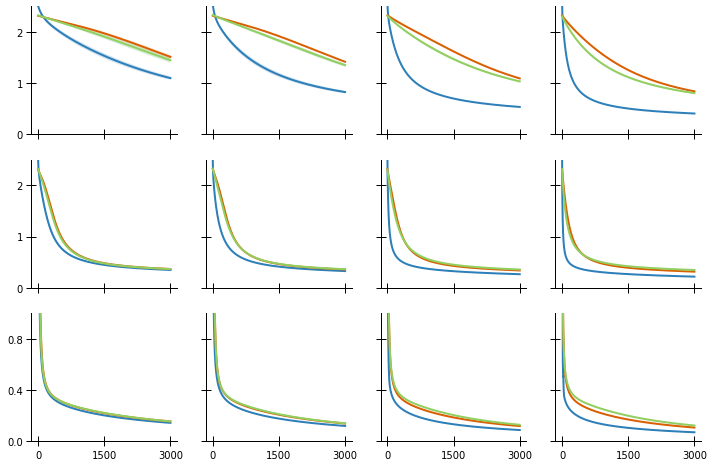

In [6]:
fig = plt.figure(figsize=(12, 8))
i = 0
for lr in learning_rate:
    for h in hidden_size:
        ax = fig.add_subplot(3, 4, i + 1)
        for m in models:
            avg_loss = mnist[m]['train_loss'][h][lr]['mean']
            std_err = mnist[m]['train_loss'][h][lr]['std']
            plt.plot(np.arange(n_epochs), avg_loss, lw=2, c=colors[m])
            plt.fill_between(np.arange(n_epochs), avg_loss - std_err, avg_loss + std_err, alpha=0.2)
#             print('%s, %0.4f' % (h, avg_loss[-1]))
#         plt.title((h, lr))
    
        ax.set_xticks(np.arange(0, 3001, 1500))
        if i < 4:
            plt.ylim([0, 2.5])
            ax.set_xticklabels([])
            ax.set_yticks(np.arange(0, 2.2, 1))
            if i % 4 != 0:
                ax.set_yticklabels([])
        
        elif i < 8:
            plt.ylim([0, 2.5])
            ax.set_yticks(np.arange(0, 2.2, 1))
            ax.set_xticklabels([])
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        elif i < 12:
            plt.ylim([0, 1])
            ax.set_yticks(np.arange(0, 1.2, 0.4))
            if i % 4 !=0:
                ax.set_yticklabels([])
                
        i += 1
        
# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/init_GD_mnist_loss.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### Plot test error

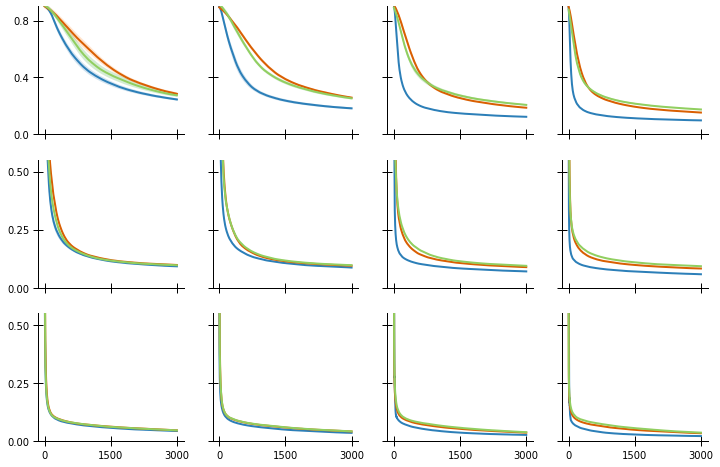

In [8]:
fig = plt.figure(figsize=(12, 8))
i = 0
for lr in learning_rate:
    for h in hidden_size:
        ax = fig.add_subplot(3, 4, i + 1)
        for m in models:
            avg_err = 1 - mnist[m]['test_accuracy'][h][lr]['mean']
            std_err = mnist[m]['test_accuracy'][h][lr]['std']
            plt.plot(np.arange(n_epochs), avg_err, lw=2, c=colors[m])
            plt.fill_between(np.arange(n_epochs), avg_err - std_err, avg_err + std_err, alpha=0.2)
#             print('%s, %0.4f' % (h, avg_loss[-1]))
#         plt.title((h, lr))
        
        ax.set_xticks(np.arange(0, 3001, 1500))
        if i < 4:
            plt.ylim([0, 0.9])
            ax.set_xticklabels([])
            ax.set_yticks(np.arange(0, 1, 0.4))
            if i % 4 != 0:
                ax.set_yticklabels([])
        
        elif i < 8:
            plt.ylim([0, 0.55])
            ax.set_yticks(np.arange(0, 0.55, 0.25))
            ax.set_xticklabels([])
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        elif i < 12:
            plt.ylim([0, 0.55])
            ax.set_yticks(np.arange(0, 0.55, 0.25))
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        i += 1
        
# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/init_GD_mnist_test_err.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

###  Plot classification on KMNIST dataset

#### plot training loss

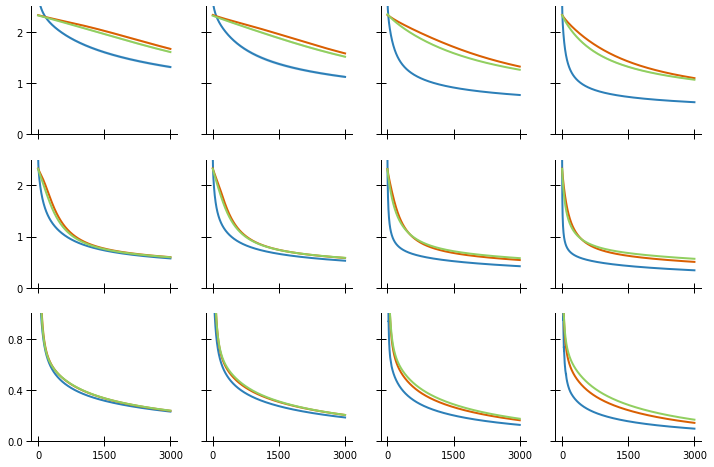

In [9]:
fig = plt.figure(figsize=(12, 8))
i = 0
for lr in learning_rate:
    for h in hidden_size:
        ax = fig.add_subplot(3, 4, i + 1)
        for m in models:
            avg_loss = kmnist[m]['train_loss'][h][lr]['mean']
            std_err = kmnist[m]['train_loss'][h][lr]['std']
            plt.plot(np.arange(n_epochs), avg_loss, lw=2, c=colors[m])
            plt.fill_between(np.arange(n_epochs), avg_loss - std_err, avg_loss + std_err, alpha=0.2)
#             print('%s, %0.4f' % (h, avg_loss[-1]))
#         plt.title((h, lr))
    
        ax.set_xticks(np.arange(0, 3001, 1500))
        if i < 4:
            plt.ylim([0, 2.5])
            ax.set_xticklabels([])
            ax.set_yticks(np.arange(0, 2.2, 1))
            if i % 4 != 0:
                ax.set_yticklabels([])
        
        elif i < 8:
            plt.ylim([0, 2.5])
            ax.set_yticks(np.arange(0, 2.2, 1))
            ax.set_xticklabels([])
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        elif i < 12:
            plt.ylim([0, 1])
            ax.set_yticks(np.arange(0, 1.2, 0.4))
            if i % 4 !=0:
                ax.set_yticklabels([])
                
        i += 1
        
# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/init_GD_kmnist_loss.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### plot test error

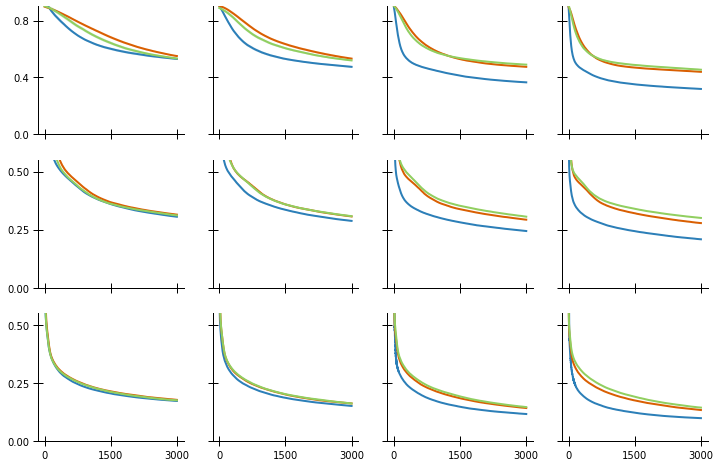

In [10]:
fig = plt.figure(figsize=(12, 8))
i = 0
for lr in learning_rate:
    for h in hidden_size:
        ax = fig.add_subplot(3, 4, i + 1)
        for m in models:
            avg_err = 1 - kmnist[m]['test_accuracy'][h][lr]['mean']
            std_err = kmnist[m]['test_accuracy'][h][lr]['std']
            plt.plot(np.arange(n_epochs), avg_err, lw=2, c=colors[m])
            plt.fill_between(np.arange(n_epochs), avg_err - std_err, avg_err + std_err, alpha=0.2)
#             print('%s, %0.4f' % (h, avg_loss[-1]))
#         plt.title((h, lr))
        
        ax.set_xticks(np.arange(0, 3001, 1500))
        if i < 4:
            plt.ylim([0, 0.9])
            ax.set_xticklabels([])
            ax.set_yticks(np.arange(0, 1, 0.4))
            if i % 4 != 0:
                ax.set_yticklabels([])
        
        elif i < 8:
            plt.ylim([0, 0.55])
            ax.set_yticks(np.arange(0, 0.55, 0.25))
            ax.set_xticklabels([])
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        elif i < 12:
            plt.ylim([0, 0.55])
            ax.set_yticks(np.arange(0, 0.55, 0.25))
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        i += 1
        
# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/init_GD_kmnist_test_err.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)